In [1]:
#preprocess step.........

import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

warnings.filterwarnings('ignore')


# USING FUNCTION TO HANDLE OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

df = pd.read_csv(r'C:\Users\nh013\Desktop\ICR - Identifying Age-Related Conditions data set\icr_processed.csv')

# features
features = ['Id', 'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD', 'BN', 'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD',
            'CF', 'CH', 'CL', 'CR', 'CS', 'CU', 'CW', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY', 'EB', 'EE',
            'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD', 'FE', 'FI', 'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL',
            'Alpha', 'Beta', 'Gamma', 'Delta', 'Epsilon', 'Class']



# REPLACE EMPTY STRING WITH NAN AND DROP ROWS WITH MISSING VALUES
df = df.replace(' ', np.nan)
df.dropna(inplace=True)


# CONVERT CATEGORICAL VALUE TO NUMERICAL
label_encoder = LabelEncoder()
for col in features:
    if col in df.columns:
        df[col] = label_encoder.fit_transform(df[col])

        
# FILL MISSING VALUES WITH MEAN AND MODE
mean = df.mean()
df.fillna(mean, inplace=True)
mode = df.mode().iloc[0]
df.fillna(mode, inplace=True)


# FILL MISSING VALUES WITH FORWARD FILL AND BACKWARD FILL
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)


# REMOVE DUPLICATE ROWS
df.drop_duplicates(inplace=True)

# IMPUTE MISSING VALUES USING KNN IMPUTATION EXCEPT CATGORICAL COLUMN
numerical_features = [col for col in features if col in df.columns and col != 'Class']
imputer = KNNImputer(n_neighbors=5)
df[numerical_features] = imputer.fit_transform(df[numerical_features])

# CONVERT CATEGORICAL VALUES TO NUMERICAL
label_encoder = LabelEncoder()
if 'EJ' in df.columns:
    df['EJ'] = label_encoder.fit_transform(df['EJ'])

# HANDLE OUTLIERS
df_encoded = handle_outliers(df, 'EJ')


# NORMALIZE AND SCALE 
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print(df)
print(df.shape[0])

           Id        AB        AF        AH        AM        AR        AX  \
0   -1.729246 -1.000247 -0.007189 -0.621393  0.102125 -0.438225 -1.791845   
1   -1.723631 -1.377469 -1.572058 -0.621393  0.823847 -0.438225 -1.193025   
2   -1.718017  0.301166 -0.418108 -0.621393  0.653361 -0.438225  0.933218   
3   -1.712403 -0.792776  0.533197  0.726936  1.414863 -0.438225 -1.166990   
4   -1.706788 -0.113778  0.443133 -0.621393 -0.648010 -0.438225 -0.958705   
..        ...       ...       ...       ...       ...       ...       ...   
612  1.706788 -1.358607  0.009698  0.830654 -1.244709  1.689287 -1.297168   
613  1.712403  0.150277  1.293116 -0.621393  1.022746  2.451381  0.525326   
614  1.718017  0.112555 -0.564463  1.126990  1.176183  0.450885  1.427895   
615  1.723631 -0.189222 -1.465107 -0.621393  0.181685 -0.438225  1.410538   
616  1.729246  0.376610 -0.361818  2.653121  1.568299 -0.438225 -1.470739   

           AY        AZ        BC  ...        GF        GH        GI  \
0  

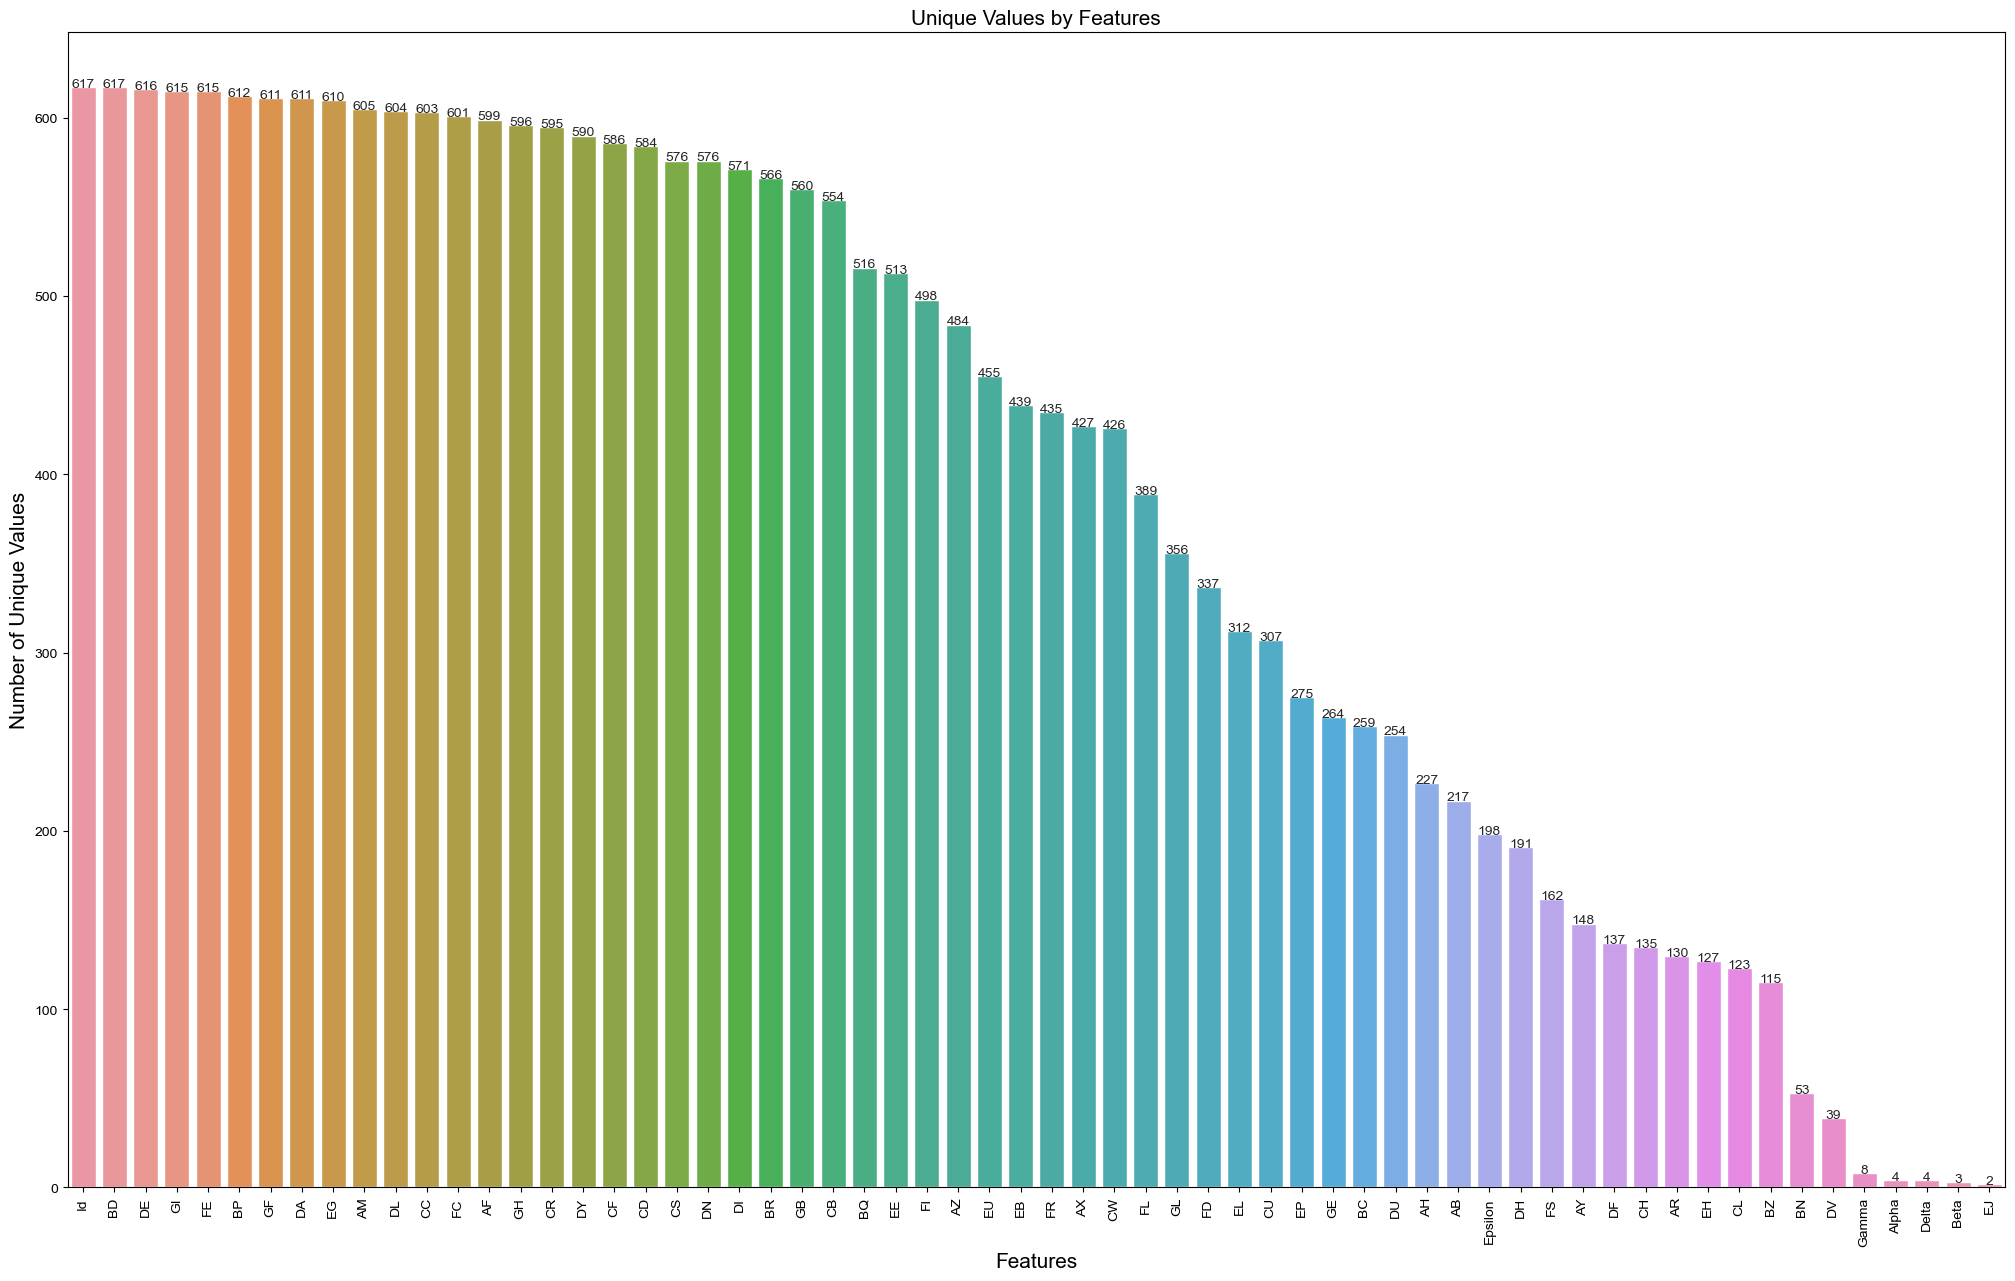

In [2]:
# EDA analysis

import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

warnings.filterwarnings('ignore')


df = pd.read_csv(r'C:\Users\nh013\Desktop\ICR - Identifying Age-Related Conditions data set\icr_processed.csv')


# FEATURES
features = ['Id', 'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD', 'BN', 'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD',
            'CF', 'CH', 'CL', 'CR', 'CS', 'CU', 'CW', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY', 'EB', 'EE',
            'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD', 'FE', 'FI', 'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL',
            'Alpha', 'Beta', 'Gamma', 'Delta', 'Epsilon', 'Class']



# REPLACE EMPTY STRING WITH NA AND DROP ROWS WITH MISSING VALUES
df = df.replace(' ', np.nan)
df.dropna(inplace=True)



# CONVERT CATEGORICAL VALUE TO NUMERICAL
label_encoder = LabelEncoder()
for col in features:
    if col in df.columns:
        df[col] = label_encoder.fit_transform(df[col])

        
        
# FILL MISSING VALUES WITH MEAN AND MODE
mean = df.mean()
df.fillna(mean, inplace=True)
mode = df.mode().iloc[0]
df.fillna(mode, inplace=True)



# FILL MISSING VALUES WITH FORWARD FILL AND BACKWARD FILL
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)



# REMOVE DUPLICATE ROWS
df.drop_duplicates(inplace=True)



# IMPUTE MISSING VALUES USING KNN IMPUTATION 
numerical_features = [col for col in features if col in df.columns and col != 'Class']
imputer = KNNImputer(n_neighbors=5)
df[numerical_features] = imputer.fit_transform(df[numerical_features])


# NORMALIZE AND SCALE ALL NUMERICAL COLUMNS
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])



data = {
    "Features": [],
    "Counts": []
}

for feature in df.columns:
    if feature != "Class":
        data["Features"].append(feature)
        data["Counts"].append(df[feature].nunique())

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25, 15))

sns.set_style('darkgrid')
sns.set_palette('Set2')

counts = pd.DataFrame(data)
_ = sns.barplot(x=counts.Features, y=counts.Counts, ax=ax, order=counts.sort_values('Counts', ascending=False).Features)
for p in ax.patches:
    ax.text(x=p.get_x()+(p.get_width()/2), y=p.get_height(), s="{:,d}".format(round(p.get_height())), ha="center")
_ = ax.set_title("Unique Values by Features", fontsize=15)
_ = ax.set_ylabel("Number of Unique Values", fontsize=15)
_ = ax.set_xlabel("Features", fontsize=15)
for label in ax.get_xticklabels():
    label.set_rotation(90)

plt.show()

In [3]:
#Random forsetclassifier.........

import pandas as pd
import numpy as np
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

warnings.filterwarnings('ignore')

# USING FUNCTION TO HANDLE OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


df = pd.read_csv(r'C:\Users\nh013\Desktop\ICR - Identifying Age-Related Conditions data set\icr_processed.csv')

# FEATURES
features = ['Id', 'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD', 'BN', 'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD',
            'CF', 'CH', 'CL', 'CR', 'CS', 'CU', 'CW', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY', 'EB', 'EE',
            'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD', 'FE', 'FI', 'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL',
            'Alpha', 'Beta', 'Gamma', 'Delta', 'Epsilon', 'Class']

# REPLACE EMPTY STRING WITH NAN AND DROP ROWS WITH MISSING VALUES
df = df.replace(' ', np.nan)
df.dropna(inplace=True)

# CONVERT CATEGORICAL VALUE TO NUMERICAL
label_encoder = LabelEncoder()
for col in features:
    if col in df.columns:
        df[col] = label_encoder.fit_transform(df[col])

# FILL MISSING VALUES WITH MEAN AND MODE
mean = df.mean()
df.fillna(mean, inplace=True)
mode = df.mode().iloc[0]
df.fillna(mode, inplace=True)

# FILL MISSING VALUES WITH FORWARD FILL AND BACKWARD FILL
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

# REMOVE DUPLICATE ROWS 
df.drop_duplicates(inplace=True)

# IMPUTE MISSING VALUES USING KNN IMPUTATION EXCEPT CATGORICAL COLUMN
numerical_features = [col for col in features if col in df.columns and col != 'Class']
imputer = KNNImputer(n_neighbors=5)
df[numerical_features] = imputer.fit_transform(df[numerical_features])

# HANDLE HOTLIERS
df_encoded = handle_outliers(df, 'EJ')

# NORMALIZE AND SCALING 
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# SPLIT
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MODEL
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

# EVALUATE MODEL
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)


print("Predictions and Probabilities:")
for pred, prob in zip(y_pred, y_pred_proba):
    print(f"Prediction: {pred}, Probability: {prob}")



Accuracy: 1.0
ROC AUC Score: 1.0
Predictions and Probabilities:
Prediction: 1, Probability: 0.89
Prediction: 0, Probability: 0.02
Prediction: 0, Probability: 0.02
Prediction: 1, Probability: 0.9
Prediction: 1, Probability: 0.86
Prediction: 0, Probability: 0.01
Prediction: 1, Probability: 0.95
Prediction: 0, Probability: 0.02
Prediction: 0, Probability: 0.0
Prediction: 0, Probability: 0.02
Prediction: 0, Probability: 0.01
Prediction: 1, Probability: 0.94
Prediction: 0, Probability: 0.1
Prediction: 1, Probability: 0.88
Prediction: 0, Probability: 0.05
Prediction: 0, Probability: 0.0
Prediction: 0, Probability: 0.01
Prediction: 0, Probability: 0.0
Prediction: 0, Probability: 0.05
Prediction: 1, Probability: 0.86
Prediction: 1, Probability: 0.88
Prediction: 0, Probability: 0.09
Prediction: 0, Probability: 0.0
Prediction: 0, Probability: 0.07
Prediction: 0, Probability: 0.1
Prediction: 0, Probability: 0.0
Prediction: 0, Probability: 0.01
Prediction: 0, Probability: 0.03
Prediction: 0, Proba

In [4]:
#XGBOOST MODEL

import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
import xgboost as xgb

warnings.filterwarnings('ignore')

# USING FUNCTION TO HANDLE OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


df = pd.read_csv(r'C:\Users\nh013\Desktop\ICR - Identifying Age-Related Conditions data set\icr_processed.csv')

# FEATURES
features = ['Id', 'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD', 'BN', 'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD',
            'CF', 'CH', 'CL', 'CR', 'CS', 'CU', 'CW', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY', 'EB', 'EE',
            'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD', 'FE', 'FI', 'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL',
            'Alpha', 'Beta', 'Gamma', 'Delta', 'Epsilon']


target = 'Class'



# REPLACE EMPTY STRING WITH NAN AND DROP ROWS WITH MISSING VALUES
df = df.replace(' ', np.nan)
df.dropna(inplace=True)


# CONVERT CATEGORICAL VALUE TO NUMERICAL
label_encoder = LabelEncoder()
for col in features:
    if col in df.columns:
        df[col] = label_encoder.fit_transform(df[col])

        
# FILL MISSING VALUES WITH MEAN AND MODE
mean = df.mean()
df.fillna(mean, inplace=True)
mode = df.mode().iloc[0]
df.fillna(mode, inplace=True)


# FILL MISSING VALUES WITH FORWARD FILL AND BACKWARD FILL
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)


# REMOVE DUPLICATE ROWS
df.drop_duplicates(inplace=True)

# IMPUTE MISSING VALUES USING KNN IMPUTATION EXCEPT CATEGORICAL COLUMN
numerical_features = [col for col in features if col in df.columns and col != target]
imputer = KNNImputer(n_neighbors=5)
df[numerical_features] = imputer.fit_transform(df[numerical_features])


# HANDLE OUTLIERS
df_encoded = handle_outliers(df, 'EJ')


# NORMALIZE AND SCALE 
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# SPLIT 
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)



# MODEL
model = xgb.XGBClassifier()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]


accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print('Accuracy:', accuracy)
print('ROC AUC Score:', roc_auc)
print('Predictions and Probabilities:')
for pred, prob in zip(y_pred, y_pred_prob):
    print('Prediction:', pred, 'Probability:', prob)


Accuracy: 1.0
ROC AUC Score: 1.0
Predictions and Probabilities:
Prediction: 1 Probability: 0.98997235
Prediction: 0 Probability: 0.0036782976
Prediction: 0 Probability: 0.0017076447
Prediction: 1 Probability: 0.9900231
Prediction: 1 Probability: 0.9923522
Prediction: 0 Probability: 0.0025885727
Prediction: 1 Probability: 0.9856209
Prediction: 0 Probability: 0.003156757
Prediction: 0 Probability: 0.0025083022
Prediction: 0 Probability: 0.0031455965
Prediction: 0 Probability: 0.0034829376
Prediction: 1 Probability: 0.9886072
Prediction: 0 Probability: 0.0027472668
Prediction: 1 Probability: 0.98732495
Prediction: 0 Probability: 0.0024128717
Prediction: 0 Probability: 0.0019780865
Prediction: 0 Probability: 0.0025513177
Prediction: 0 Probability: 0.002917013
Prediction: 0 Probability: 0.0022731891
Prediction: 1 Probability: 0.9908482
Prediction: 1 Probability: 0.98844236
Prediction: 0 Probability: 0.0026491396
Prediction: 0 Probability: 0.002812538
Prediction: 0 Probability: 0.0025513177


In [7]:
#LOGISTICS REGRESSION

import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

warnings.filterwarnings('ignore')

# USING FUNCTION TO HANDLE OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


df = pd.read_csv(r'C:\Users\nh013\Desktop\ICR - Identifying Age-Related Conditions data set\icr_processed.csv')

# FEATURES
features = ['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD', 'BN', 'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD',
            'CF', 'CH', 'CL', 'CR', 'CS', 'CU', 'CW', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY', 'EB', 'EE',
            'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD', 'FE', 'FI', 'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL',
            'Alpha', 'Beta', 'Gamma', 'Delta', 'Epsilon']

target = 'Class'

# REPLACE EMPTY STRING WITH NA AND DROP ROWS WITH MISSING VALUES
df = df.replace(' ', np.nan)
df.dropna(inplace=True)

# CONVERT CATEGORICAL VALUE TO NUMERICAL
label_encoder = LabelEncoder()
for col in features:
    if col in df.columns:
        df[col] = label_encoder.fit_transform(df[col])

# FILL MISSING VALUES WITH MEAN AND MODE
mean = df.mean()
df.fillna(mean, inplace=True)
mode = df.mode().iloc[0]
df.fillna(mode, inplace=True)

# FILL MISSING VALUES WITH FORWARD FILL AND BACKWARD FILL
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

# REMOVE DUPLICATE ROWS
df.drop_duplicates(inplace=True)

# IMPUTE MISSING VALUES USING KNN IMPUTATION EXCEPT  CATEGORICL COLUMN
numerical_features = [col for col in features if col in df.columns and col != 'Class']
imputer = KNNImputer(n_neighbors=5)
df[numerical_features] = imputer.fit_transform(df[numerical_features])

# CONVERT CATEGORICAL VALUES TO NUMERICAL
label_encoder = LabelEncoder()
if 'EJ' in df.columns:
    df['EJ'] = label_encoder.fit_transform(df['EJ'])

# HANDLE OUTLIERS
df_encoded = handle_outliers(df, 'EJ')


# NORMALIZE AND SCALE 
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])




# SPLIT
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)


# LOGISTIC REGRESSION MODEL
logreg = LogisticRegression()
logreg.fit(X_train, y_train)



y_pred = logreg.predict(X_test)




print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[101   0]
 [  0  23]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00        23

    accuracy                           1.00       124
   macro avg       1.00      1.00      1.00       124
weighted avg       1.00      1.00      1.00       124

